In [2]:
import numpy as np

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('dataset.csv')

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df['Year'].value_counts()

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2007     2
2003     2
2018     1
2004     1
Name: Year, dtype: int64

In [9]:
df['no_of_yrs']=2020-df['Year']

In [10]:
df['no_of_yrs']

0       6
1       7
2       3
3       9
4       6
       ..
296     4
297     5
298    11
299     3
300     4
Name: no_of_yrs, Length: 301, dtype: int64

In [11]:
df1=df.drop('Year',axis=1)

In [12]:
df1.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_yrs
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [13]:
df2=df1.drop('Car_Name',axis=1)

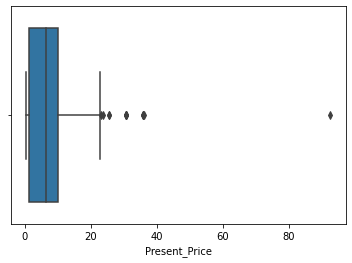

In [14]:
sns.boxplot(df2['Present_Price'])

In [15]:
df3=df2.copy()

df3['Present_Price']=df3['Present_Price'].apply(lambda x:np.log10(x))

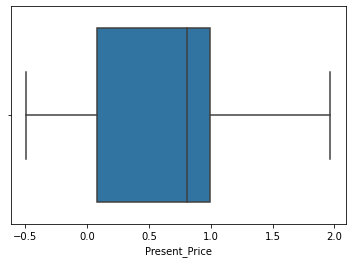

In [16]:
sns.boxplot(df3.Present_Price)

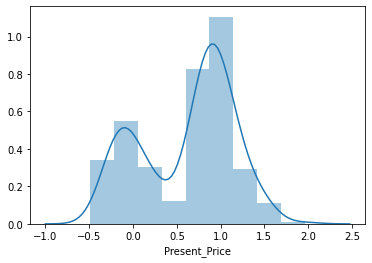

In [17]:
sns.distplot(df3.Present_Price)

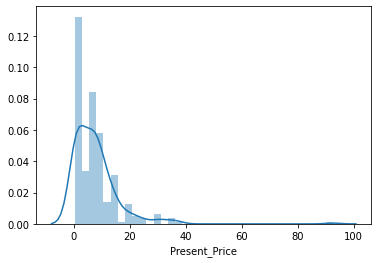

In [18]:
sns.distplot(df2.Present_Price)

In [19]:
## feature importance

In [20]:
## uninvariate selection

In [21]:
df3.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_yrs
0,3.35,0.747412,27000,Petrol,Dealer,Manual,0,6
1,4.75,0.979548,43000,Diesel,Dealer,Manual,0,7
2,7.25,0.993436,6900,Petrol,Dealer,Manual,0,3
3,2.85,0.618048,5200,Petrol,Dealer,Manual,0,9
4,4.60,0.836957,42450,Diesel,Dealer,Manual,0,6


In [49]:
df4['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [23]:
dum1=pd.get_dummies(df3.Fuel_Type,drop_first=True)
dum2=pd.get_dummies(df3.Seller_Type,drop_first=True)
dum3=pd.get_dummies(df3.Transmission,drop_first=True)

In [24]:
df4=pd.concat([df3,dum1,dum2,dum3],axis=1)

In [25]:
df4.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_yrs,Diesel,Petrol,Individual,Manual
0,3.35,0.747412,27000,Petrol,Dealer,Manual,0,6,0,1,0,1
1,4.75,0.979548,43000,Diesel,Dealer,Manual,0,7,1,0,0,1
2,7.25,0.993436,6900,Petrol,Dealer,Manual,0,3,0,1,0,1
3,2.85,0.618048,5200,Petrol,Dealer,Manual,0,9,0,1,0,1
4,4.60,0.836957,42450,Diesel,Dealer,Manual,0,6,1,0,0,1


In [26]:
cormat=df4.corr()

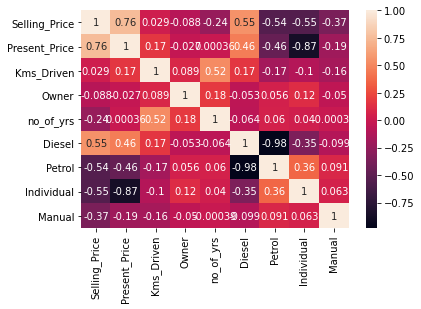

In [27]:

%matplotlib inline
plt.Figure(figsize=(20,20))
sns.heatmap(cormat,annot=True)
plt.show()

In [28]:
df5=df4.drop(['Fuel_Type','Seller_Type','Transmission'],axis=1)

In [29]:
df5.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_yrs,Diesel,Petrol,Individual,Manual
0,3.35,0.747412,27000,0,6,0,1,0,1
1,4.75,0.979548,43000,0,7,1,0,0,1
2,7.25,0.993436,6900,0,3,0,1,0,1
3,2.85,0.618048,5200,0,9,0,1,0,1
4,4.60,0.836957,42450,0,6,1,0,0,1


In [30]:
y=df5.iloc[:,0]
x=df5.drop('Selling_Price',axis=1)

x['Present_Price']=10**x['Present_Price']

In [32]:
from sklearn.ensemble import ExtraTreesRegressor
et=ExtraTreesRegressor()
et.fit(x,y)
et.feature_importances_

array([0.39936341, 0.04022758, 0.00050732, 0.07820204, 0.21576456,
       0.01393491, 0.12523771, 0.12676246])

In [33]:
tmp=pd.Series(et.feature_importances_,index=x.columns)

In [34]:
tmp.sort_values(ascending=False)

Present_Price    0.399363
Diesel           0.215765
Manual           0.126762
Individual       0.125238
no_of_yrs        0.078202
Kms_Driven       0.040228
Petrol           0.013935
Owner            0.000507
dtype: float64

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [36]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

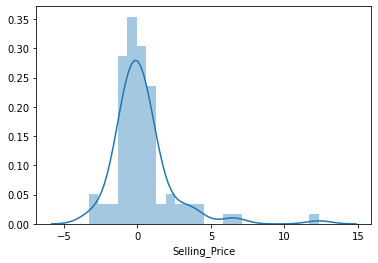

In [37]:
sns.distplot(y_test-y_pred)

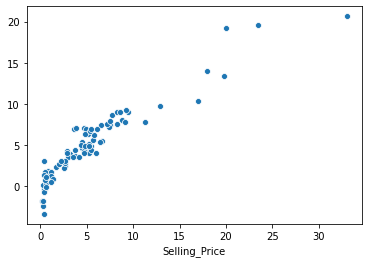

In [38]:
sns.scatterplot(y_test,y_pred)

In [39]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

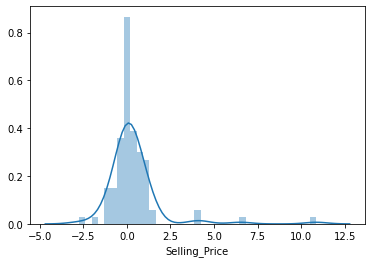

In [40]:
sns.distplot(y_test-y_pred)

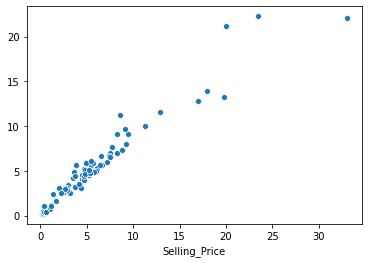

In [41]:
sns.scatterplot(y_test,y_pred)

In [42]:
from sklearn import metrics

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.7721296703296704
MSE: 2.6227270318681306
RMSE: 1.619483569496193


In [44]:
### saving the model

In [45]:
import pickle as pk

In [46]:
with open("model.pkl","wb") as f:
    pk.dump(rfr,f)

In [52]:
rfr.predict(np.array([23,27000,2,7,0,1,0,1]).reshape((1,-1)))

array([7.72])

In [53]:
rfr.predict(np.array([23,27000,2,7,0,1,0,1]).reshape((1,-1)))

array([7.72])